# Proyek Analisis Data: Bike Sharing Dataset (Day)
- **Nama:** Ade Kurnia
- **Email:** ade.kur.gntg@gmail.com
- **ID Dicoding:** akrkmnd

## Menentukan Pertanyaan Bisnis

- Bagaimana performa terkait persewaan sepeda antara tahun 2011 dan 2012?
- Bagaimana pola terkait persewaan sepeda dalam musim tertentu?

## Import Semua Packages/Library yang Digunakan

In [369]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [370]:
# Load Bike Sharing Dataset (Day)
bs_day_df = pd.read_csv("day.csv")
bs_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [371]:
# Cek Info Data
bs_day_df.info()

# Tipe data dari dteday perlu diubah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [372]:
# Cek Data Duplikasi
print("Jumlah duplikasi: ", bs_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [373]:
# Cek Missing Data
bs_day_df.isna().sum()

# Terlihat dari info diatas semua data lengkap yaitu sebanyak 731, maka tidak ada missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [374]:
# Periksa Parameter Statistik
bs_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



### Cleaning Data

In [375]:
# Mengubah Tipe Data
datetime_columns = ["dteday"]

for column in datetime_columns:
  bs_day_df[column] = pd.to_datetime(bs_day_df[column])

In [376]:
# Cek Data
bs_day_df.info()

# Disini dapat dilihat tipe data dteday sudah menjadi datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

In [377]:
# Statistik Deskriptif
bs_day_df.describe(include="all")

<ipython-input-377-6c325e3ef05c>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bs_day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [378]:
# Pengelompokkan Setiap Tahun (0 = 2011, 1 = 2012)
bs_day_df.groupby(by="yr").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                        
   nunique  max min      mean       std
yr                                     
0      365   12   1  6.526027  3.452584
1      366   12   1  6.513661  3.455958

In [379]:
# Pengelompokkan Banyaknya Data setiap Musim kemudian mengurutkan dari yang terbesar
bs_day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-380-fff24e008941>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-380-fff24e008941>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="yr_label", y="cnt", data=year_rentals, palette=colors, width=0.4)


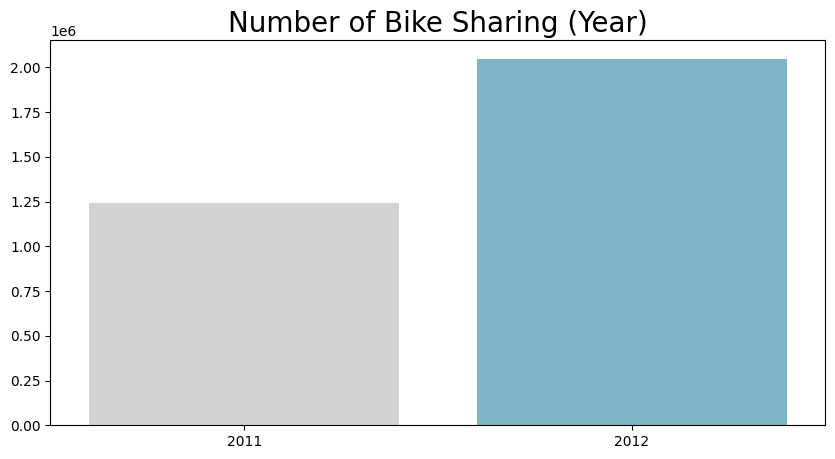

In [380]:
# Definisi Warna
colors = ["#D3D3D3", "#72BCD4"]

# Pengelompokkan dan Aggregsi dari Persewaan Sepeda per Tahun
year_rentals = bs_day_df.groupby(by="yr")["cnt"].sum().reset_index()

# Penggantian Label Tahun (0 = 2011, 1 = 2012)
year_rentals["yr_label"] = year_rentals["yr"].map({0: 2011, 1: 2012})

# Visualisasi menggunakan Bar
plt.figure(figsize=(10, 5))
sns.barplot(
    x="yr_label",
    y="cnt",
    data = year_rentals.sort_values(by = "yr_label", ascending = False),
    palette=colors
)
ax = sns.barplot(x="yr_label", y="cnt", data=year_rentals, palette=colors, width=0.4)
ax.grid(False, axis='both')

plt.title('Number of Bike Sharing (Year)', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

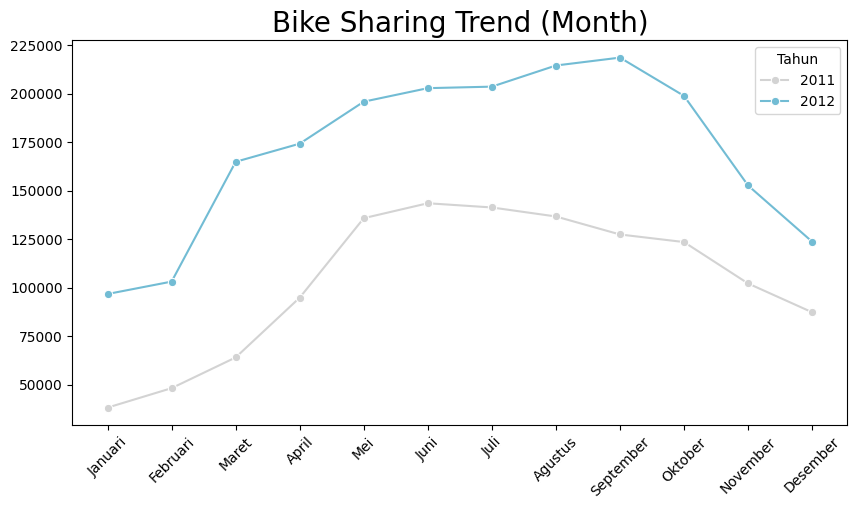

In [381]:
# Pengelompokkan dan Aggregsi dari Persewaan Sepeda per Bulan dari setiap Tahun
month_rentals = bs_day_df.groupby(by=["yr", "mnth"])["cnt"].sum().reset_index()

# Penggantian Label Tahun dan Bulan
month_rentals["yr_label"] = month_rentals["yr"].map({0: 2011, 1: 2012})
month_rentals["mnth_label"] = month_rentals["mnth"].map({
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
})

# Visualisasi menggunakan Line dan Marker
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x="mnth_label", y="cnt", hue="yr_label", data=month_rentals, marker='o', palette=["#D3D3D3", "#72BCD4"])
ax.grid(False, axis='both')

plt.title('Bike Sharing Trend (Month)', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='center', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Tahun")
plt.show()

### Pertanyaan 2:

<ipython-input-382-50d7e2f21ebf>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


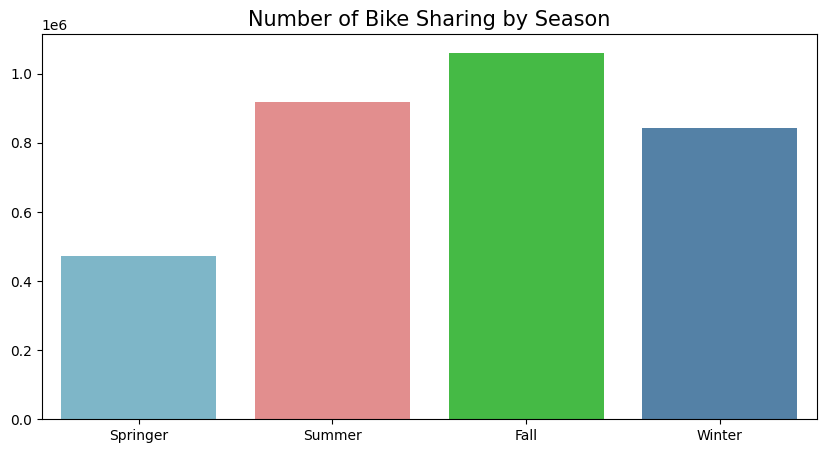

In [382]:
# Pengelompokkan dan Agregasi dari Persewaan Sepeda per Musim
season_rentals = bs_day_df.groupby(by="season").cnt.sum().reset_index()

# Penggantian Label Musim
season_rentals["season_label"] = season_rentals["season"].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Visualisasi
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#F08080", "#32CD32", "#4682B4"]
sns.barplot(
    x='season_label',
    y='cnt',
    data=season_rentals.sort_values(by="season", ascending=True),
    palette=colors
)
plt.title('Number of Bike Sharing by Season', loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

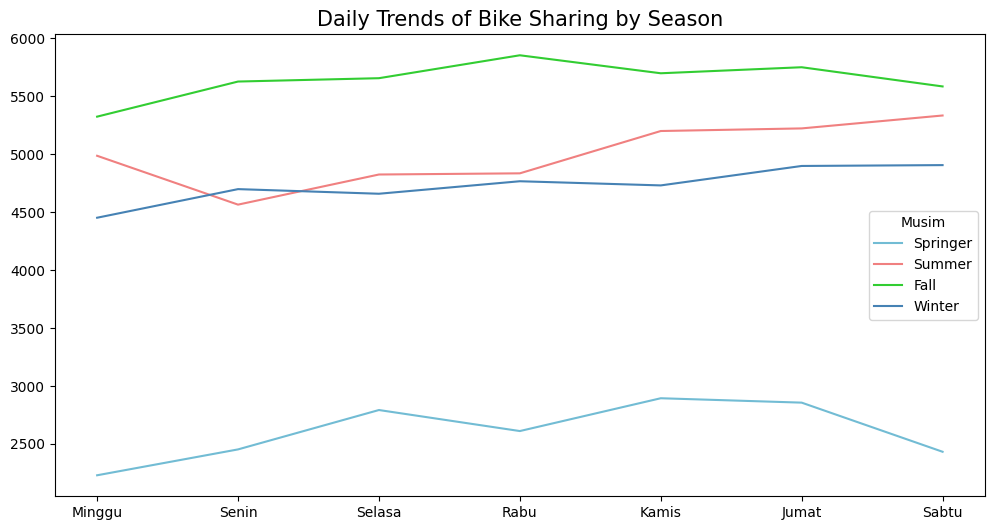

In [383]:
# Pengelompokkan dan Agregasi dari Persewaan Sepeda per Musim
daily_season_rentals = bs_day_df.groupby(['season', 'weekday']).cnt.mean().reset_index()

# Penggantian Label Musim
daily_season_rentals["season_label"] = daily_season_rentals["season"].map({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
daily_season_rentals["weekday_label"] = daily_season_rentals["weekday"].map({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
    })

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='weekday_label',
    y='cnt',
    hue='season_label',
    data=daily_season_rentals,
    palette=["#72BCD4", "#F08080", "#32CD32", "#4682B4"]
)

plt.title('Daily Trends of Bike Sharing by Season', loc="center", fontsize=15)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Musim')
plt.show()

## Conclusion

- Jumlah total persewaan sepeda mengalami peningkatan signifikan dari tahun 2011 ke tahun 2012, yang mungkin disebabkan oleh berbagai faktor seperti peningkatan popularitas atau fasilitas sepeda. Terdapat tren positif pada persewaan sepeda casual dan terdaftar, menunjukkan intensitas penggunaan dan daya tarik layanan yang semakin meningkat.
- Musim gugur (Fall) menunjukkan rata-rata persewaan sepeda yang lebih tinggi, mungkin karena kondisi cuaca yang nyaman. Bisnis persewaan sepeda dapat memanfaatkan permintaan ini dengan mengoptimalkan strategi pemasaran dan layanan selama musim gugur untuk meningkatkan kinerja bisnis secara keseluruhan.